In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = [
    "Yoga can increase strength and tone in muscles",
    "Yoga can improve circulation and blood pressure",
    "Yoga can improve digestion by increasing blood circulation and massaging the muscles.",
    "Yoga can help reduce stress and cortisol levels",
    "Yoga can help you get into a better sleep mindset and stay asleep",
    "Yoga can help improve mood and reduce negative feelings"
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(6, 384)


In [4]:
sentences_2 = [
    "Paris is known for its monuments, museums, art, and cuisine",
    "Eiffel Tower is an iconic symbol of Paris",
    "Notre-Dame Cathedral is a holy site in Paris",
    "Arc de Triomphe is a famous monument in Paris",
    "Seine River is a picturesque river in Paris",
    "Louvre is a famous museum in Paris.",
    "Palace of Versailles is a UNESCO World Heritage Site"
]

# 2. Calculate embeddings by calling model.encode()
embeddings_2 = model.encode(sentences_2)
print(embeddings_2.shape)

(7, 384)


In [14]:
# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings_2)
print(similarities)

tensor([[-0.0164,  0.0086, -0.0629,  0.0147, -0.0193,  0.0023, -0.0148],
        [-0.0206, -0.0415, -0.0643, -0.0137, -0.0012, -0.0203,  0.0421],
        [ 0.0208, -0.0573, -0.0843,  0.0209, -0.0107, -0.0141, -0.0048],
        [-0.0228,  0.0257, -0.0700, -0.0305, -0.0521, -0.0197,  0.0244],
        [-0.0275, -0.0211, -0.0605, -0.0278, -0.0736, -0.0188,  0.0052],
        [-0.0394, -0.0014, -0.1231, -0.0616, -0.0694, -0.0523, -0.0114]])


In [6]:
tsne = TSNE(perplexity=5)

(6, 2)


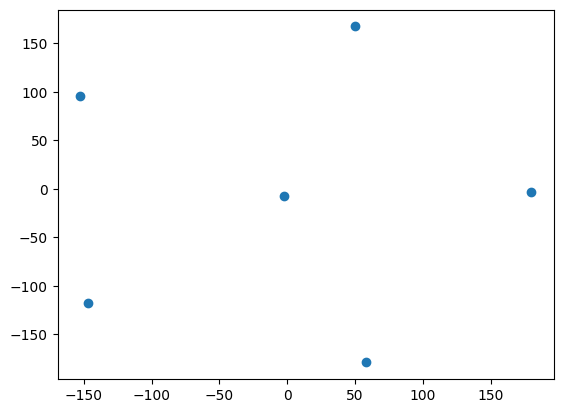

In [7]:
result = tsne.fit_transform(embeddings)
print(result.shape)  # (924, 2)

plt.scatter(result[:, 0], result[:, 1])

(7, 2)


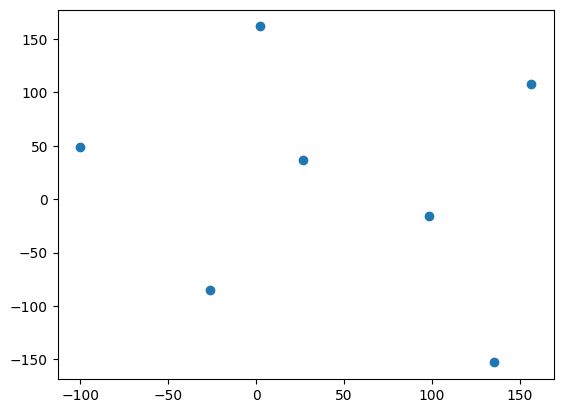

In [8]:
result_2 = tsne.fit_transform(embeddings_2)
print(result_2.shape)  # (924, 2)

plt.scatter(result_2[:, 0], result_2[:, 1])

In [11]:
combined_sentences = sentences + sentences_2
combined_embeddings = model.encode(combined_sentences)
print(combined_embeddings.shape)

(13, 384)


(13, 2)


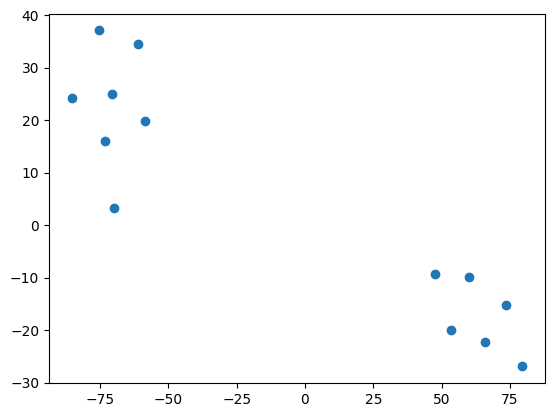

In [12]:
result_combined = tsne.fit_transform(combined_embeddings)
print(result_combined.shape)  # (924, 2)

plt.scatter(result_combined[:, 0], result_combined[:, 1])